In [4]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [7]:
crime_data = pd.read_csv('C:\\Users\\aamir\\Documents\\DATA SCIENCE\\.spyder-py3\\working practice\\crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:
print(crime_data.head())


   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [9]:
X = crime_data[['Murder', 'Assault', 'UrbanPop', 'Rape']]


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
def hierarchical_clustering(data, linkage_method='ward'):
    plt.figure(figsize=(10, 6))
    dendrogram(linkage(data, method=linkage_method))
    plt.title(f'Hierarchical Clustering - {linkage_method} Linkage')
    plt.show()

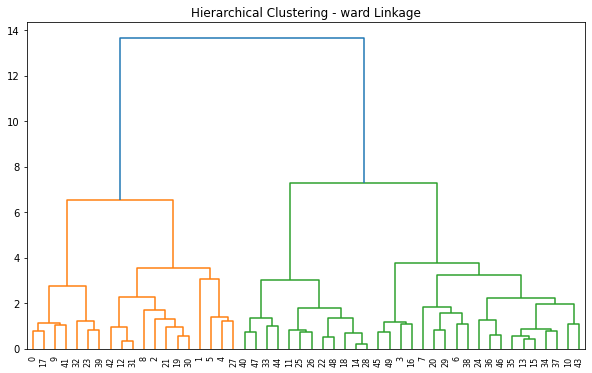

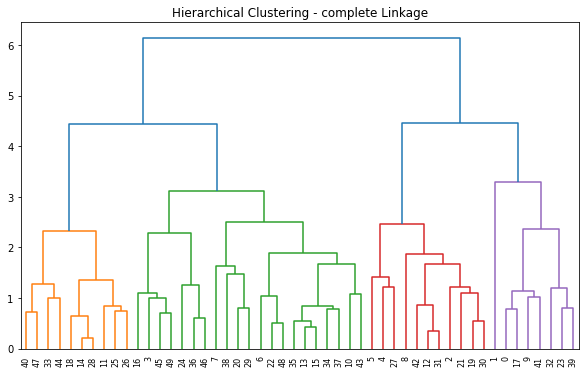

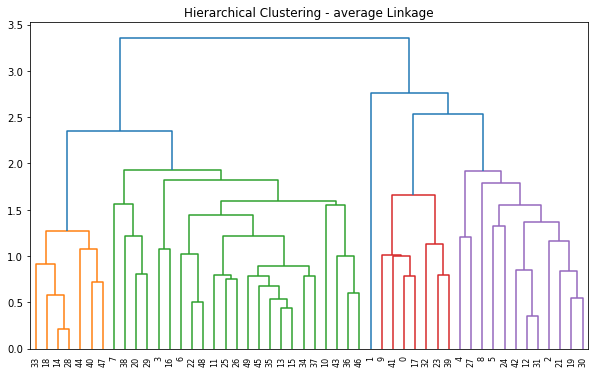

In [12]:
hierarchical_clustering(X_scaled, linkage_method='ward')
hierarchical_clustering(X_scaled, linkage_method='complete')
hierarchical_clustering(X_scaled, linkage_method='average')


In [13]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    
    silhouette_avg = silhouette_score(data, labels)
    
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')
    
    # Visualize the clusters
    sns.scatterplot(x='UrbanPop', y='Murder', hue=labels, data=crime_data, palette='viridis')
    plt.title(f'KMeans Clustering - {n_clusters} Clusters')
    plt.show()


Number of clusters: 2, Silhouette Score: 0.4084890326217641


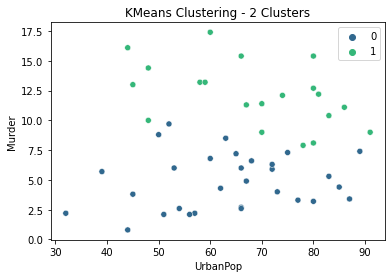

Number of clusters: 3, Silhouette Score: 0.30813622648945616


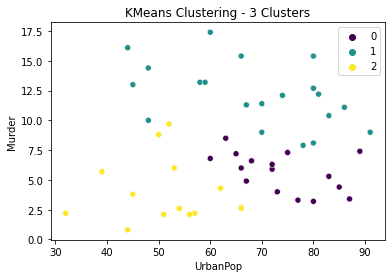

Number of clusters: 4, Silhouette Score: 0.33968891433344395


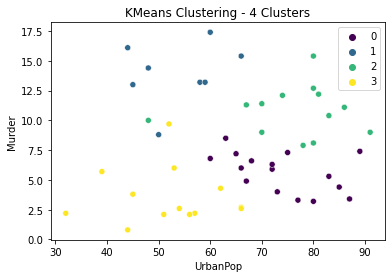

Number of clusters: 5, Silhouette Score: 0.2892698909578641


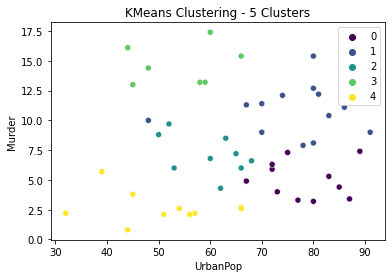

In [14]:
for n_clusters in range(2, 6):
    kmeans_clustering(X_scaled, n_clusters)


In [17]:
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    
    unique_labels = len(set(labels)) - (1 if -1 in labels else 0)  # Ignore noise label (-1)
    
    print(f'Eps: {eps}, Min Samples: {min_samples}, Number of Clusters: {unique_labels}')
    
    # Visualize the clusters
    sns.scatterplot(x='UrbanPop', y='Murder', hue=labels, data=crime_data, palette='viridis')
    plt.title(f'DBSCAN Clustering - {unique_labels} Clusters')
    plt.show()


Eps: 0.5, Min Samples: 5, Number of Clusters: 0


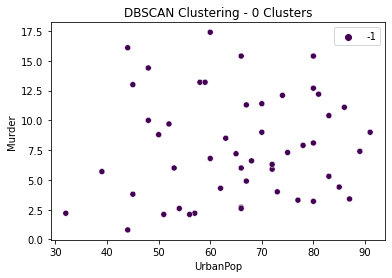

Eps: 1.0, Min Samples: 5, Number of Clusters: 2


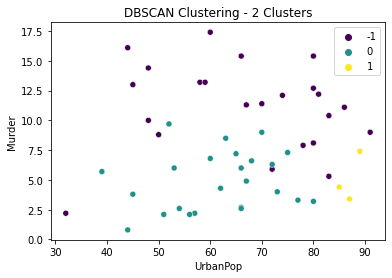

Eps: 1.5, Min Samples: 5, Number of Clusters: 1


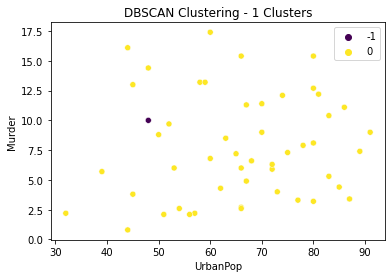

In [18]:
dbscan_clustering(X_scaled, eps=0.5, min_samples=5)
dbscan_clustering(X_scaled, eps=1.0, min_samples=5)
dbscan_clustering(X_scaled, eps=1.5, min_samples=5)